#  <center>MOD 9.5 - Réseaux informatiques</center>
## <center style="color: #06A">BE 3 - Le protocole HTTP</center>

<center>__GASMI Rémy et VINCENT Simon__</center>

<h3 style="font-size:150%;color:white;background-color: #7fb2d4;padding:0.2em">A - Informations générales</h3>

<h4 style="font-size:150%;color:#06A;margin:1em 0 1.33em">1. Déroulement de la séance.</h4>

Comme précédemment, le travail sera à effectuer par binôme. Le compte-rendu doit être rédigé
en complétant directement le présent notebook qui devra être déposé sur moodle une fois le travail terminé.

Avant de déposer le résultat de votre travail, merci de __mentionner vos noms au sein du document__, puis au moment du dépôt de bien vouloir nommer le fichier sous la forme :

<code>CR &lt;nom eleve 1> - &lt;nom eleve 2> - &lt;N° BE></code> 

<h4 style="font-size:150%;color:#06A;margin-bottom:1.33em">2. Objectif du travail demandé.</h4>

L'objectif du BE consiste à envoyer des requêtes HTTP vers des ressources diverses, de relever les réponses obtenues et de commenter ce que vous observez.

Pour cela, les fonctions <code>http_request</code> et <code>https_request</code> ci-dessous vont vous aider à envoyer une requête HTTP (resp. HTTPS) en Python depuis le notebook et à afficher le résultat obtenu :

In [2]:
import html
import http.client
from IPython.display import display, HTML, Image

def http_request(method, server, path, body=None, headers={}, port=80, silent=False):
    conn = http.client.HTTPConnection(server, port)
    resp = send_request(conn, method, path, body, headers)
    body = resp.read()
    if silent:
        return (resp,body)
    else:
        display_response(resp,body)

def https_request(method, server, path, body=None, headers={}, port=443, silent=False):
    conn = http.client.HTTPSConnection(server, port)
    resp = send_request(conn, method, path, body, headers)
    body = resp.read()
    if silent:
        return (resp,body)
    else:
        display_response(resp,body)

def send_request(conn, method, path, body=None, headers={}):
    conn.request(method, path, body, headers)
    return conn.getresponse()

def display_response(response,body):
    display_status_line(response)
    display_headers(response.headers)
    contentType = response.getheader('Content-Type')
    if contentType:
        if contentType.startswith('text') or contentType.startswith('application/json') or 'xml' in contentType:
            display_body(body.decode('UTF-8'), contentType)
        elif contentType.startswith('image'):
            display_body(body, contentType)
        else:
            display_error('Le notebook ne sait pas afficher le type de contenu {}'.format(contentType))
    return body


def display_error(msg):
    display_html(
        '<i style="margin-top:-0.4em; font-family:Consolas,monospace; ' +\
        'display:inline-block; margin-top:10px; color:#ccc">{}</i>',
        msg)

def display_status_line(response):
    display_html(
        "<code style='font-family:Consolas,monospace; display:block; margin-top: 5px; " +\
        "border-bottom:1px solid #ccc'><span style='font-weight:bold;color:#008'>{}</span> - {}</code>",
        response.status, response.reason)

def display_headers(headers):
    for h in headers:
        display_header(h,headers[h])

def display_header(header,value):
    display_html(
        "<code style='display:block; margin-top:-0.7em; font-family:Consolas,monospace'><b>{}:</b> {}</code>",
        header, value)
    
def display_body(body, contentType):
    preformatted = "<pre style='font-family:Consolas,monospace; padding:5px; " + \
        "border: 1px solid #ccc; border-radius:5px; box-shadow: 5px 5px 5px #ccc; " + \
        "margin:5px 0 10px 0; display: inline-block; min-width: 50%'>{}</pre>"
    freeformat = "<div style='padding:5px; border: 1px solid #ccc; border-radius:5px; " + \
        "box-shadow: 5px 5px 5px #ccc; margin:5px 0 10px 0; display: inline-block; " + \
        "min-width: 50%'>{}</div>"
    if ( len(body) ):
        if ( contentType.startswith('application/json') ) :
            display_html(preformatted, body)
        elif ( contentType.startswith('text/html') ) :
            display_html(freeformat, body)
        elif ( contentType == 'image/svg+xml') :
            display_html(freeformat, body)
        elif ( contentType.startswith('text/plain') ) :
            display_html(preformatted, html.escape(body))
        elif ( contentType.startswith('image') ) :
            display(Image(body))
    
def display_html(fmt,*args):
    display(HTML(fmt.format(*args)))

Voici comment utiliser la fonction <code>http_request()</code> pour effectuer une requête GET vers l'adresse http://httpbin.org/robots.txt :

In [3]:
http_request('GET','httpbin.org','/robots.txt')

Et voici comment effectuer une requête POST avec un corps :

In [4]:
https_request('POST','mod95-be3.onrender.com','/message', headers={
    'Content-Type': 'application/x-www-form-urlencoded'
}, body="pr%C3%A9nom=Raymond&nom=Deubaze&message=Bonjour D%C3%A9d%C3%A9+!")

<h3 style="font-size:150%;color:white;background-color:#7fb2d4;padding:0.2em">B - Travail à effectuer</h3>

<h4 style="font-size:150%;color:#06A;margin:1em 0 1.33em">1. Exemples de requêtes HTTP</h4>

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[1.1]__ - Effectuer une requête vers la ressource <a href="https://mod95-be3.onrender.com/hello.html">hello.html</a>.
</div>

In [5]:
https_request('GET','mod95-be3.onrender.com','/hello.html')

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[1.2]__ - Comment peut-on obtenir uniquement les entêtes de cette même ressource ?
</div>

In [6]:
https_request('HEAD','mod95-be3.onrender.com','/hello.html')

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[1.3]__ - Expliquer à quoi sert chacune des entêtes de la réponse que vous obtenez.
</div>

Décrivons chacune des entêtes de la réponse : 

* `Date` : Représente la date et l'heure de génération de la réponse du serveur, formatée en GMT (Greenwich Mean Time).
* `Content-Type` : Indique le type de contenu de la réponse. Ici, le contenu est du HTML, avec l'encodage de caractères spécifié en UTF-8.
* `Connection` : Demande au client et au serveur de maintenir la connexion ouverte pour des requêtes supplémentaires, ce qui réduit la latence en évitant de rouvrir la connexion pour chaque requête.
* `CF-Ray` : Un identifiant unique généré par Cloudflare pour tracer la requête. Il inclut un suffixe représentant le centre de données Cloudflare qui a servi la requête.
* `CF-Cache-Status` : Indique le statut de la mise en cache de Cloudflare. "DYNAMIC" signifie que le contenu n'a pas été mis en cache et a été servi dynamiquement.
* `Cache-Control` : Spécifie la politique de cache pour la réponse. Ici "public" permet le stockage en cache par tout type de cache, et "max-age=0" indique que la réponse est expirée et doit être revalidée avant d'être utilisée.
* `ETag` : Un identifiant unique associé à la version actuelle de la ressource, utilisé pour le contrôle de la mise en cache et la validation des ressources côté client.
* `Last-Modified` : Indique la dernière date et heure à laquelle la ressource a été modifiée, utilisé pour la gestion du cache et les requêtes conditionnelles.
* `Vary` : Informe les caches intermédiaires de différencier les réponses en fonction de l'en-tête Accept-Encoding de la requête. Cela permet de servir des versions compressées ou non compressées.
* `rndr-id` : Un identifiant interne, probablement utilisé par la plateforme Render pour tracer et identifier la requête.
* `x-powered-by` : Indique que le serveur est propulsé par Express, un framework web pour Node.js.
* `x-render-origin-server` : Désigne le serveur d'origine qui a servi la requête, ici, la plateforme Render.
* `Server` : Spécifie le logiciel de serveur qui a traité la requête. Ici, Cloudflare, qui agit comme un proxy inverse.
* `alt-svc` : Indique le support pour le protocole HTTP/3 sur le port 443 et définit la durée de vie de l'entrée alt-svc à 86400 secondes (24 heures).

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[1.4]__ - Observer maintenant les entêtes obtenues en accédant à <a href="http://dmolinarius.github.io/demofiles/mod-95/be-http/hello.html">hello.html</a>.<br>
Il s'agit d'un document ayant le même contenu que le précédent, mais hébergé sur un serveur différent.
</div>

In [7]:
https_request('HEAD','dmolinarius.github.io','/demofiles/mod-95/be-http/hello.html')

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[1.5]__ - Expliquer à quoi servent chacune des nouvelles entêtes de la réponse que vous obtenez.<br>
A quoi correspondent les entêtes dont le nom commence par X- ?
</div>
<!-- cf. https://stackoverflow.com/questions/3561381/custom-http-headers-naming-conventions -->

* `Content-Length`: Indique la taille de la réponse en octets. Ici, la taille de la réponse est de 181 octets.

* `Server`: Spécifie le logiciel de serveur utilisé pour répondre à la requête. Ici, il s'agit du serveur de GitHub Pages.

* `permissions-policy`: Définit la politique de permissions. L'attribut interest-cohort=() spécifiquement désactive la technologie FLoC (Federated Learning of Cohorts), ce qui renforce la confidentialité.

* `Access-Control-Allow-Origin`: Permet le partage des ressources entre origines (CORS), en autorisant toutes les origines (*), facilitant ainsi l'accès à la ressource par des requêtes venant de différents domaines.

* `expires` : Indique quand la réponse expire (ici Tue, 19 Nov 2024 07:43:04 GMT) et doit être considérée comme obsolète par les caches.

* `x-proxy-cache`: Indique le statut de la requête par rapport au cache proxy. "MISS" signifie que la ressource n'a pas été trouvée dans le cache et a dû être récupérée depuis l'origine

* `X-GitHub-Request-Id`: Un identifiant unique (7725:10098:1127EE8:1188FF3:673C3F30) de la requête généré par GitHub pour tracer la demande.

* `Accept-Ranges`: Indique que le serveur prend en charge les requêtes de reprise de téléchargement et peut envoyer des parties spécifiques du fichier. Ici (bytes), cela signifie que le serveur permet de spécifier des plages de données en octets.

* `Age`: Indique l'âge de la réponse en secondes depuis qu'elle a été servie par le cache. Un âge de 0 signifie qu'elle est fraîche et vient d'être générée.

* `Via`: Indique que la réponse est passée par un cache intermédiaire, ici Varnish.

* `X-Served-By`: Spécifie quel serveur de cache a servi la réponse, ici un cache situé en France.

* `X-Cache`: Indique que la ressource a été trouvée dans le cache et servie directement sans requête vers le serveur d'origine. Ici (HIT) signifie que la ressource était déjà présente dans le cache et qu'elle a été retournée directement au client. 

* `X-Cache-Hits`: Nombre de fois que l'objet a été servi directement du cache. Un zéro ici pourrait indiquer une cache HIT récente.

* `X-Timer`: Une information de diagnostic utilisée pour mesurer le temps de traitement de la requête sur le serveur : 
    * `S1732002541.149185` : Cette partie représente un horodatage précis du moment où la requête a été initiée, exprimé en secondes depuis l'époque Unix (le 1er janvier 1970). La fraction décimale permet d'obtenir une précision accrue (jusqu'à la microseconde).

    * `VS0` : Correspond au temps (en millisecondes) pris par le serveur de réception initial (ou le point d'entrée du CDN) pour commencer à traiter la requête.

    * `VE99` : Représente le temps (en millisecondes) nécessaire au traitement total de la requête, jusqu'à ce qu'elle soit prête à être envoyée au client. Ici, VE99 indique que la requête a pris 99 millisecondes pour être entièrement traitée.

* `X-Fastly-Request-ID`: Un identifiant unique (244bff5e6475e5d3cbe1b0f6802c4c034ed88ede) de la requête, généré par Fastly (un CDN) pour le suivi et le diagnostic.


Les en-têtes personnalisées `X-` ont été historiquement utilisées pour ajouter des fonctionnalités spécifiques qui ne sont pas couvertes par les en-têtes standardisés. Elles servent souvent à des fins de diagnostic, de suivi des performances, de mise en cache, ou de gestion des requêtes. Les fournisseurs de services, comme GitHub ou Fastly, les utilisent pour transmettre des informations spécifiques à leur infrastructure afin d'aider au suivi, à la surveillance et à la résolution des problèmes.

Bien que l'utilisation des en-têtes `X-` ait été une pratique courante, les recommandations actuelles de l'IETF préfèrent l'utilisation d'en-têtes non standard sans préfixe `X-` pour éviter la confusion et mieux s'intégrer dans les futures normes.

<h4 style="font-size:150%;color:#06a;margin-bottom:1.33em;border-top:3px solid #7fb2d4; padding-top:0.5em">2. Divers types de ressources.</h4>

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[2.1]__ - Effectuer maintenant une requête vers la ressource
<a href="https://mod95-be3.onrender.com/hello.txt">hello.txt</a> et observer les entêtes obtenues.<br>
Comparer les codes source des deux documents, puis expliciter l'ensemble des similitudes et des différences avec les entêtes correspondant à
<a href="https://mod95-be3.onrender.com/hello.html">hello.html</a>.
</div>

In [8]:
https_request('GET','mod95-be3.onrender.com','/hello.html')

In [9]:
https_request('HEAD','mod95-be3.onrender.com','/hello.html')

Dans l'entete http, le serveur renvoie un document en précisant son type dans l'entête "content type", pas dans l'extension .html ou .txt. En effet, la requête en .hmtl à reçu un document ayant pour content type " text/html; charset=UTF-8", tandis que celle en txt à reçu dans l'entête : " text/plain; charset=UTF-8". 

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[2.2]__ - Visualiser ces deux ressources à l'aide d'un navigateur et noter la différence (s'il n'y en a pas, changer de navigateur). Commenter.
</div>

Les deux ressources s'affichent de manière très différente :

![image.png](attachment:image.png)

La ressource HTTP est affichée en suivant les directives situées dans le corps (body) de la réponse envoyée par le serveur, tandis que le fichier .txt affiche directement le contenu du corps lui-même. Cela s'explique par le fait que les fichiers de type HTTP sont, en quelque sorte, des documents texte enrichis, et que le navigateur ne les affichera correctement que si le serveur précise qu'il s'agit d'un document HTTP.

On peut notamment remarquer que le texte "Exemple" apparaît avec le style spécifié par la ligne "\<h1 style="margin:0 0 0.33em"\>Exemple\</h1\>" dans la version HTML, tandis qu'il est affiché dans une police normale dans la version texte.

De plus, la version texte s'affiche sur fond noir. Cela est spécifique à la machine et au mode sombre, qui affiche les documents texte sur fond noir dans ce navigateur. On observe que ce n'est pas automatiquement le cas pour un document HTTP.


<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[2.3]__ - Effectuer les requêtes permettant d'obtenir les ressources
<a href="https://mod95-be3.onrender.com/file1.html">file1.html</a>,
<a href="https://mod95-be3.onrender.com/file2.html">file2.html</a>,
<a href="https://mod95-be3.onrender.com/file3.html">file3.html</a>,
 et essayez de les ouvrir directement dans votre navigateur.<br>
Commenter ce que vous observez et les réponses obtenues, en indiquant notamment quel est le type respectif de chacune de ces ressources et comment les navigateurs les affichent. Préciser comment fait le navigateur pour savoir comment afficher chacune de ces ressources, et donner votre avis sur la pertinence de la démarche qui consisterait à essayer d'inférer le type d'une ressource à partir de son URL.

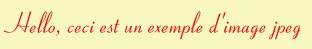

In [10]:
https_request('GET','mod95-be3.onrender.com','/file1.html')

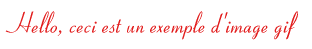

In [11]:
https_request('GET','mod95-be3.onrender.com','/file2.html')

In [12]:
https_request('GET','mod95-be3.onrender.com','/file3.html')

Nous avons effectué trois requêtes 'GET', chacune demandant une ressource dont l'extension se termine par ".html".

Cependant, la première requête a obtenu une image JPEG, la seconde un GIF, et la dernière un PDF. Sans se fier au contenu de ces documents, on peut confirmer leur nature en consultant le champ Content-Type de leurs en-têtes : la première indique "image/jpeg", la deuxième "image/gif", et la troisième "application/pdf".

Cela illustre que l'extension de la requête a peu d'importance côté client : c’est le serveur qui la traite et qui détermine quel contenu renvoyer dans l’en-tête et le corps (head et body). Ensuite, le client reçoit cet en-tête et ce corps, puis interprète le corps selon le type de document spécifié par le Content-Type de l'en-tête, et non selon l'extension initialement envoyée.

<h4 style="font-size:150%;color:#06A;margin-bottom:1.33em;border-top:3px solid #7fb2d4; padding-top:0.5em">3. Requêtes conditionnelles.</h4>

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[3.1]__ - Afin de faciliter la gestion des caches, HTTP/1.0 possède la directive Last-Modified, tandis que HTTP/1.1 a introduit la notion d'Etag. Noter la date de dernière modification et l'Etag de la ressource
<a href="https://mod95-be3.onrender.com/hello.html">hello.html</a>.
</div>

In [14]:
(response,body) = https_request('GET','mod95-be3.onrender.com','/hello.html',silent=True)

cache_last_modified = response.getheader('Last-Modified')
cache_etag =  response.getheader('Etag')
print(f"La dernière modification du document remonte à : {cache_last_modified} ")
print(f"et son Etag est : {cache_etag}")

La dernière modification du document remonte à : Tue, 02 May 2023 16:38:12 GMT 
et son Etag est : W/"b6-187dd542520"


In [15]:
https_request('GET','mod95-be3.onrender.com','/hello.html', headers = {'If-Modified-Since': cache_last_modified})

In [16]:
https_request('GET','mod95-be3.onrender.com','/hello.html', headers = {'If-Modified-Since': 'Tue,  Oct  : 1980 19:65:65 GMT'})

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[3.2]__ - Effectuer une requête GET conditionnelle vers cette même ressource, dont la directive If-Modified-Since correspond à la date de dernière modification du document. En effectuer une autre avec une date antérieure. Commenter les résultats observés et conclure sur le fonctionnement et l'utilité de cette directive.
</div>

Après une requête, le contenu du document peut être stocké dans le navigateur ou sur un proxy, ce qu’on appelle le cache.

Cependant, si on envoie une nouvelle requête alors que la dernière version du document est déjà en cache, il serait inefficace pour le serveur de renvoyer cette même ressource. Il est donc nécessaire de vérifier si le document a été modifié depuis qu'il a été mis en cache.

Une première façon de vérifier la modification du document est d'utiliser l’en-tête If-Modified-Since, suivi d’une date au format "Tue, 02 May 2023 16:38:12 GMT". Si cette directive est incluse dans la requête, le serveur compare cette date avec la date de la dernière modification du document.

Si le document n’a pas été modifié depuis la date spécifiée, alors le serveur renvoie uniquement l’en-tête (head), ce qui explique pourquoi le code deux cellules plus haut ne renvoie que cet en-tête.
Si le document a été modifié, alors le serveur le renvoie en entier, avec son en-tête et son contenu (head et body), comme le montre le code ci-dessus où le corps du document est également affiché.


<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[3.3]__ - Effectuer le même exercice avec une requête conditionnelle basée sur l'Etag. A votre avis, pourquoi y a-t-il eu cette nouvelle possibilité en HTTP/1.1 ?
</div>

In [17]:
https_request('GET','mod95-be3.onrender.com','/hello.html', headers = {'If-None-Match' : cache_etag })

In [18]:
https_request('GET','mod95-be3.onrender.com','/hello.html',
               headers = {'If-None-Match' : 'Ceci n\'est pas le Etag du document' })

Au lieu de comparer les dates de modification, on pourrait simplement comparer le document caché et le document du serveur. Encore mieux, on peut comparer des signatures uniques des documents. C'est le Principe de l'Etag.

Pour comparer les Etag de la ressource caché et celle du serveur, on inclu la directive :  headers = {'If-None-Match' : 'Etag du document' } . 

Comme pour If-Modified-Since: 

Si Le document n'as pas le même Etag que la requête, alors le serveur le renvoie en entier, avec sa head et son body. C'est pourquois le code ci-desssus renvoie la head, et le body qui est affiché. 
Si as le même Etag que la requête, alors le serveur renvoie seulement la head. C'est pourquois le code deux cellules aux dessus ne renvoie que l'en-tête.




<h4 style="font-size:150%;color:#06A;margin-bottom:1.33em;border-top:3px solid #7fb2d4; padding-top:0.5em">4. Redirections.</h4>

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[4.1]__ - Examiner la réponse obtenue lors d'une requête vers 
<a href="https://mod95-be3.onrender.com/moved">cette ressource</a> et décrire le comportement
d'un navigateur lorsqu'il reçoit ce type de réponse.<br>
<em>-- attention, il y a éventuellement un piège --</em>
</div>

In [52]:
https_request('GET','mod95-be3.onrender.com','/moved')

... vos explications ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[4.2]__ - Essayer maintenant
<a href="https://mod95-be3.onrender.com/perm">cette nouvelle ressource</a>. Quelle sont les différences avec la précédente ? Consulter par exemple la <a href="https://en.wikipedia.org/wiki/List_of_HTTP_status_codes#4xx_Client_errors">liste des statuts HTTP</a> et préciser en quoi le comportement attendu des clients est différent.
</div>

In [53]:
https_request('GET','mod95-be3.onrender.com','/perm')

...différences notées et attendues de la part des clients

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[4.3]__ - Ce type de redirection est utilisé par les raccourcisseurs d'URLs. Vérifier ceci en envoyant une requête
vers la ressource <a href="http://bit.ly/2Oz8wbC">http://bit.ly/2Oz8wbC</a>. Commenter le résultat obtenu et expliquer pourquoi ce type de réponse est approprié pour ces services.
</div>

In [59]:
http_request('GET','bit.ly','/2Oz8wbC')

... vos commentaires et explications

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[4.4]__ - Voici encore
<a href="https://mod95-be3.onrender.com/found">une ressource</a> et
<a href="https://mod95-be3.onrender.com/temp">une dernière</a>
effectuant chacune une redirection. En vous référant encore une fois à la documentation, expliquer les différences de comportement attendues de la part d'un client recevant chacune de ces réponses, l'une par rapport à l'autre, puis par rapport aux deux codes de redirection observés précédemment.
</div>

In [55]:
https_request('GET','mod95-be3.onrender.com','/found')

In [56]:
https_request('GET','mod95-be3.onrender.com','/temp')

... vos explications

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[4.5]__ - Ce type de redirection est utilisé par les portails captifs. Vérifier ceci en envoyant une requête
vers la ressource <a href="https://campus.ec-lyon.fr">https://campus.ec-lyon.fr</a>. Commenter le résultat obtenu et expliquer pourquoi ce type de réponse est approprié pour ces services.
</div>

In [63]:
https_request('GET','campus.ec-lyon.fr','/')

... vos commentaires et explications ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[4.6]__ - Voici un dernier exemple : <a href="http://mod95-be3.onrender.com/hello.html">http://mod95-be3.onrender.com/hello.html</a>. Commenter.
</div>

In [58]:
http_request('GET','mod95-be3.onrender.com','/hello.html')

... vos commentaires et explications ici

<h4 style="font-size:150%;color:#06A;margin-bottom:1.33em;border-top:3px solid #7fb2d4; padding-top:0.5em">5. Authentification.</h4>

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.1]__ - La ressource <a href="https://mod95-be3.onrender.com/user.html">user.html</a>
est protégée avec un nom d'utilisateur et un mot de passe. Quelles sont les informations renvoyées par le serveur permettant au navigateur de gérer cette situation ? Comment réagit le navigateur ?
</div>

In [24]:
# votre code ici

... votre réponse ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.2]__ - Le nom d'utilisateur et le mot de passe permettant d'accéder à la ressource
<a href="https://mod95-be3.onrender.com/user.html">user.html</a> sont respectivement
<code>be-http</code> et <code>cool!</code>. Indiquer quelle est la directive à ajouter à la requête pour accéder à cette ressource, et comment est construite la valeur transmise au serveur.

... vos indications ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.3]__ -  Le module Python nommé base64 permet d'encoder des chaînes de caractères en base64. Après vous être documenté sur la façon d'utiliser ce module, déterminer quelle est l'entête exacte permettant au navigateur d'obtenir la ressource protégée, et vérifier à l'aide d'une requête que cela fonctionne.

In [25]:
# votre code ici

In [26]:
# votre code ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.4]__ - Donner votre avis quant au niveau de sécurité apporté par la méthode d'authentification Basic, et des exemples de contexte dans lequel il est tout de même acceptable de l'utiliser.
</div>

... votre avis ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.5]__ - Le lien <a href="https://mod95-be3.onrender.com/401/basic">logout</a>
permet de se déconnecter et oblige l'utilisateur à fournir à nouveau le mot de passe lors de l'accès suivant
à la ressource <a href="https://mod95-be3.onrender.com/user.html">user.html</a>.
Expliquer ce que fait le serveur pour arriver à ce résultat.
</div>

In [27]:
# votre code ici

... vos explications ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.6]__ - La ressource <a href="https://mod95-be3.onrender.com/digest.html">digest.html</a> est protégée avec la méthode d'authentification Digest. Le nom d'utilisateur et le mot de passe sont les mêmes que précédemment. Décrire les nouveaux éléments dans la réponse du serveur.
</div>

In [28]:
# votre code ici

... votre description ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.7]__ - Expliquer comment construire la requête permettant d'accéder à la ressource
<a href="https://mod95-be3.onrender.com/digest.html">digest.html</a>.

In [29]:
# votre code ici

... vos explications ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.8]__ - Utiliser le module Python nommé hashlib pour crypter les chaînes requises via l'algorithme MD5
pour construire pas à pas la requête permettant d'accéder à la ressource <a href="https://mod95-be3.onrender.com/digest.html">digest.html</a>.
</div>

In [30]:
# votre code ici

In [31]:
# votre code ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.9]__ - __Remarque:__ le nonce peut être généré par le serveur à sa convenance, en fonction du client (adresse IP), de la date de la requête (durée limitée), de l'URI de la ressource (portée limitée) et être vérifié lors de toute requête ultérieure.
<p>C'est le cas du serveur recevant les requêtes précédentes qui crée des nonces dont la durée de validité est de 1 minute. C'est bien sûr trop court pour un serveur de documents statiques, et éventuellement trop long pour une API. Mais cela permet de jouer...
<p>Vérifier qu'un nonce arbitraire ainsi qu'un nonce dont la durée de vie est dépassée ne sont pas acceptés.
</div>

In [32]:
# votre code ici

In [33]:
# votre code ici

In [34]:
# votre code ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[5.10]__ - Conclure sur la méthode Digest, avec ses avantages et ses inconvénients (s'il y en a), par rapport notamment à la méthode Basic.
</div>

... vos conclusions ici

<h4 style="font-size:150%;color:#06A;margin-bottom:1.33em;border-top:3px solid #7fb2d4; padding-top:0.5em">6. Service REST</h4>

<p>REST est un concept d'architecture permettant de développer des services web
<a href="https://en.wikipedia.org/wiki/Representational_state_transfer#Relationship_between_URL_and_HTTP_methods">basés sur les méthodes HTTP</a> pour créer, consulter, modifier ou supprimer des informations <em>(CRUD - Create, Read, Update, Delete)</em>.

<p>Le service
<a href="https://mod95-be3.onrender.com/todolist">todolist</a> implémente ce type d'architecture, pour créer une TODO_list, lire son contenu, la modifier ou la supprimer. Les questions suivantes permettront de disséquer son fonctionnement.

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.1]__ - &Eacute;mettre une requête POST vers ce service et en déduire le type de contenu attendu pour créer une liste.
</div>

In [35]:
# votre code ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.2]__ - &Eacute;mettre une requête POST vers ce service avec le premier type de contenu supporté, et en déduire l'information manquante pour créer une liste.
</div>

In [36]:
# votre code ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.3]__ - Se documenter au sujet du premier type de contenu demandé, puis formuler une requête POST vers ce service avec les informations nécessaires formattées à l'aide de ce type de contenu pour créer une TODO_list comportant une tâche.
</div>

In [37]:
# votre code ici

... mettre ici une référence vers la documentation trouvée

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.4]__ - Essayer avec la tâche "Acheter du café". Sauf exception, il y aura un problème avec les caractères accentués.
Plutôt que de bricoler à la main pour résoudre le problème, consulter la documentation de
<a href="https://docs.python.org/3/library/urllib.parse.html#urllib.parse.urlencode">urllib.parse.urlencode</a> et
reformuler une requête permettant de créer une tâche dont le libellé comporte des caractères accentués. Indiquer comment ces caractères sont encodés.
</div>

In [38]:
# votre code ici

In [39]:
# votre code ici

... vos indications ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.5]__ - De fait, le service utilisé permet de créer une TODO_list avec plusieurs tâches. Relire la documentation de
<a href="https://docs.python.org/3/library/urllib.parse.html#urllib.parse.urlencode">urllib.parse.urlencode</a>
pour découvrir comment spécifier une variable dont la valeur est une liste, puis créer une TODO_list comportant plusieurs tâches.
</div>

...indiquer comment spécifier une variable prenant plusieurs valeurs (i.e. une liste)

In [40]:
# votre code ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.6]__ - Le service utilisé accepte également les requêtes au format 
<a href="https://www.json.org/">JSON</a>. Utiliser le module
<a href="https://docs.python.org/3/library/json.html">json</a> pour émettre une requête avec un corps en JSON permettant
de créer une TODO_list comportant une ou plusieurs tâches. Ne pas pas oublier de tester des tâches comportant des caractères accentués.
</div>

In [41]:
# votre code ici

In [42]:
# votre code ici

In [43]:
# votre code ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.7]__ - Une fois une liste de tâches créée, il est possible de relire son contenu avec une requête GET formulée vers la ressource <code>/todolist/list-xxxxxxxxxxxxx</code>, où la dernière partie correspond au nom de la liste à consulter. Vérifier ce fonctionnement.
</div>

In [44]:
# votre code ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.8]__ - Conformément à l'architecture REST, la méthode HTTP PUT formulée vers une adresse comme GET ci-dessus, avec par ailleurs les mêmes paramètres que POST, permet de spécifier un nouveau contenu pour la liste mentionnée. Effectuer ce type d'opération.
</div>

In [45]:
# votre code ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.9]__ - Pour modifier uniquement certains éléments d'une liste donnée, l'architecture REST préconise la méthode HTTP PATCH. Tenter ce type d'opération avec les mêmes paramètres que ci-dessus et en déduire les paramètres manquants.
</div>

In [46]:
# votre code ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.10]__ - Les paramètres manquants sont des entiers, qui donnent l'index où insérer le nouveau contenu, et le nombre d'éléments à supprimer avant d'insérer le nouveau contenu transmis.
Pour une meilleure compréhension de l'opération effectuée, consulter la document de la fonction <a href="https://developer.mozilla.org/en-US/docs/Web/JavaScript/Reference/Global_Objects/Array/splice">Array.splice()</a> utilisée par le serveur pour modifier la TODO_list à l'aide des paramètres fournis. Ajouter une tâche en fin de liste.
</div>

In [47]:
# votre code ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.11]__ - Remplacer une tâche en milieu de liste.
</div>

In [48]:
# votre code ici

<div style="background-color:#def;padding:5px 10px;margin-top: 5px;border-radius:3px">
__[6.12]__ - Enfin, la méthode HTTP DELETE permet de supprimer une TODO_list. Vérifier son fonctionnement
</div>

In [49]:
# votre code ici

In [50]:
# votre code ici

<h4 style="font-size:150%;color:#06A;margin-bottom:1.33em;border-top:3px solid #7fb2d4; padding-top:0.5em">7. Pour ceux qui en veulent toujours plus...</h4>

Le serveur qui répond à vos requêtes est hébergé chez <a href="https://render.com/">render.com</a> et son code source est disponible <a href="https://github.com/dmolinarius/mod95-be3">ici</a> via github.

Tous les codes status de la libairie http.client : https://docs.python.org/3/library/http.html